# Paket Prabayar Manakah yang Lebih Baik?
## Pendahuluan <a id='intro'></a>

Sebagai seorang analis di perusahaan telekomunikasi Megaline, proyek ini bertujuan untuk menentukan paket prabayar yang menghasilkan pendapatan lebih tinggi berdasarkan analisis data dari 500 pelanggan. Data tersebut mencakup informasi pelanggan, asal, jenis paket, serta aktivitas panggilan dan pesan pada tahun 2018. Tujuan utama proyek ini adalah membantu perusahaan mengoptimalkan pendapatan dan anggaran iklan mereka dengan memahami perilaku pelanggan..

### Tujuan: 
Dengan mencapai tujuan-tujuan ini, proyek ini diharapkan dapat membantu Megaline dalam meningkatkan pendapatan mereka dan mengambil keputusan yang lebih baik dalam pengelolaan paket prabayar mereka.

- Menganalisis perilaku pelanggan Megaline berdasarkan data yang ada, termasuk jenis paket yang mereka gunakan, jumlah panggilan, pesan, dan penggunaan data selama tahun 2018.

- Mengidentifikasi paket prabayar yang menghasilkan pendapatan lebih tinggi untuk perusahaan Megaline.

- Memberikan rekomendasi kepada departemen periklanan Megaline untuk mengalokasikan anggaran iklan dengan lebih efektif berdasarkan temuan analisis.

- Mengoptimalkan strategi pemasaran dan penawaran paket prabayar kepada pelanggan berdasarkan pemahaman lebih baik tentang preferensi dan perilaku pelanggan.

### Tahapan yang Dilakukan
Di sini kita akan melakukan analisa dataset pada 5 dataset yaitu:

`"/datasets/dfline_calls.csv"`

`"/datasets/dfline_internet.csv"`

`"/datasets/dfline_messages.csv"`

`"/datasets/dfline_plans.csv"`

`"/datasets/dfline_users.csv"`


Proyek ini terdiri dari 6 tahap: 
 1. Inisialisasi
 2. Memuat Data
 3. Mempersiapkan Data dan Memperbaiki Kualitas Data
 4. Mempelajari Syarat dan Kondisi Terkait Paket Prabayar
 5. Mengagregasi Data per Pengguna
 6. Mempelajari Perilaku Pengguna


## Ikhtisar Data

In [2]:
# Muat semua library
from scipy import stats as st
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [3]:
# Muat file data ke dalam DataFrame yang berbeda

try:
    df_calls = pd.read_csv("/datasets/megaline_calls.csv") 
    df_internet = pd.read_csv("/datasets/megaline_internet.csv") 
    df_messages = pd.read_csv("/datasets/megaline_messages.csv") 
    df_plans = pd.read_csv("/datasets/megaline_plans.csv") 
    df_users = pd.read_csv("/datasets/megaline_users.csv")
    
except:
    df_calls = pd.read_csv("megaline_calls.csv") 
    df_internet = pd.read_csv("megaline_internet.csv") 
    df_messages = pd.read_csv("megaline_messages.csv") 
    df_plans = pd.read_csv("megaline_plans.csv") 
    df_users = pd.read_csv("megaline_users.csv")

Mari kita lihat bagaimana nilai pada data-data tersebut

### Paket Prabayar

In [3]:
# Tampilkan informasi/rangkuman umum tentang DataFrame paket-paket prabayar
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


- <font color='green'>Temuan</font>

Untuk tipe data, tidak ada yang harus diubah. 

In [4]:
# Tampilkan sampel data untuk paket prabayar
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- Ditinjauh dari kolom yang bertipe data float cukup logis untuk kuatlitas data yang dimiliki. 1 menit adalah 0.03 dollar untuk paket usd_per_message dan usd_per_minute surf sedangkan 0.01 dollar untuk paket ultimate. Jika kita tinjau data ini memang logis dan bawaan tipe data tersebut sudah tepat.

- <font color='green'>Kesimpulan Sementara</font>

Untuk tipe data tidak ada yang harus diubah. Dengan kolom usd_per_message dan usd_per_minute yang memiliki tipe data float, hal ini cukup logis untuk menghitung satuan paket yang akan dihitung. Jika ini diubah dengan integer maka dipastikan harga akan terbilang sangat mahal untuk 1 message saja. Namun kita belum mengetahui apakah dengan integer atau float perhitungan akan lebih efektif untuk itu.

### Pengguna

In [7]:
# Tampilkan informasi/rangkuman umum tentang DataFrame Pengguna
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Tampilkan sampel data pengguna
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Terdapat nilai kosong pada kolom churn_date, mengacu pada deskripsi proyek ini jika kolom churn_date kosong berarti paket layanan sedang digunakan saat data ini dibuat. Jadi tidak perlu diisi, kita hanya perlu merubah tipe data yang sesuai

#### Memperbaiki Data

In [4]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Panggilan

In [16]:
# Tampilkan informasi/rangkuman umum tentang DataFrame panggilan
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
# Tampilkan sampel data berisi panggilan
df_calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Tidak terdapat nilai yang hilang, hanya terdapat kesalahan tipe data pada kolom call_date

#### Memperbaiki Data

In [6]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Pesan/SMS

In [25]:
# Tampilkan informasi/rangkuman umum tentang DataFrame SMS
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [26]:
# Tampilkan sampel data untuk SMS
df_messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Sama seperti dataframe sebelumnya, tidak terdapat nilai yang hilang tetapi terdapat tipe data yang salah terutama kolom yang memuat tanggal

#### Memperbaiki Data

In [7]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


## Internet

In [32]:
# Tampilkan informasi/rangkuman umum tentang DataFrame internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [33]:
# Tampilkan sampel data untuk traffic internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Terdapat tipe data yang salah pada kolom yang memuat tanggal

#### Memperbaiki Data

In [8]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

Kita harus memahami cara kerja paket. Sangat penting untuk memahami cara kerja paket, bagaimana pengguna dikenakan biaya berdasarkan paket prabayar yang mereka pilih. Oleh karena itu, kita akan menampilkan informasi paket guna memeriksa persyaratannya sekali lagi.

In [41]:
# Tampilkan persyaratan paket prabayar dan pastikan Anda memahaminya
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Deskripsi Kolom:

- plan_name             : nama paket telepon
- usd_monthly_fee       : biaya bulanan dalam dolar AS

- minutes_included      : alokasi menit panggilan bulanan

- messages_included     : alokasi SMS bulanan

- mb_per_month_included : alokasi volume data bulanan (dalam dfbyte)

- usd_per_minute        : harga per menit jika sudah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)

- usd_per_message       : harga per SMS jika sudah melebihi batas alokasi paket

- usd_per_gb            : harga per gigabyte tambahan data jika sudah melebihi batas alokasi paket (1 GB = 1024 dfbyte)



## Mengagregasi Data per Pengguna

- Di sini kita akan menghitung pendapatan per bulan dari setiap pengguna dan setiap paket yang dipilih. Syarat perhitungan sudah kita catat di sebelum bab ini.

- Kita sudah membersihkan data yang akan kita analisa. Sekarang, karena data yang kita miliki telah bersih, mari kita agregasikan data setiap pengguna per periode agar kita hanya memiliki satu catatan per pengguna per periode. Hal ini akan memudahkan analisis lebih lanjut.

- Sebelum kita melakukan analisa, mari kita tambahkan kolom "month" untuk setiap dataset. Hal ini untuk memudahkan kita melakukan perhitungan bulanan.



In [9]:
# membuat kolom year-month di dataset calls
df_calls['month'] = df_calls['call_date'].dt.to_period("M")
df_calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12


In [10]:
# membuat kolom year-month di dataset internet
df_internet['month'] = df_internet['session_date'].dt.to_period("M")
df_internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12


In [11]:
# membuat kolom year-month di dataset messages
df_messages['month'] = df_messages['message_date'].dt.to_period("M")
df_messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


In [12]:
# membulatkan durasi panggilan
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')
df_calls.head()


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,2018-12
1,1000_145,1000,2018-12-27,14,2018-12
2,1000_247,1000,2018-12-27,15,2018-12
3,1000_309,1000,2018-12-28,6,2018-12
4,1000_380,1000,2018-12-30,5,2018-12


In [13]:
# hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan.
df_calls_agg = pd.pivot_table(df_calls, index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()
df_calls_agg.head()

,user_id,month,duration
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426


In [14]:
# hitung jumlah paket data yang dikirim oleh setiap pengguna per bulan. 
df_internet_agg = pd.pivot_table(df_internet, index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
df_internet_agg.head()

,user_id,month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


Agar lebih memudahkan pada tahap analisis data, kita akan mengonversi mb menjadi gb

In [15]:
# convert to GB dan dibulatkan ke atas
df_internet_agg['gb_used'] = np.ceil(df_internet_agg['mb_used'] / 1024)
df_internet_agg.head()

,user_id,month,mb_used,gb_used
0,1000,2018-12,1901.47,2.0
1,1001,2018-08,6919.15,7.0
2,1001,2018-09,13314.82,14.0
3,1001,2018-10,22330.49,22.0
4,1001,2018-11,18504.30,19.0


In [17]:
# hitung jumlah SMS yang dikirim oleh setiap pengguna per bulan.
df_messages_agg = pd.pivot_table(df_messages, index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
df_messages_agg.columns = ['user_id', 'month', 'messages']
df_messages_agg.head()

,user_id,month,messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


- Mari kita gabungkan dataset yang telah kita agregasi untuk menjadi 1 dataset yang baru.

In [18]:
# Gabungkan data panggilan, menit, SMS, dan internet berdasarkan user_id dan month (bulan)
calls_internet_merge = df_calls_agg.merge(df_internet_agg, how='outer', on=['user_id', 'month'])
calls_internet_merge = calls_internet_merge.merge(df_messages_agg, how='outer', on=['user_id', 'month'])
calls_internet_merge.head()

,user_id,month,duration,mb_used,gb_used,messages
0,1000,2018-12,124.0,1901.47,2.0,11.0
1,1001,2018-08,182.0,6919.15,7.0,30.0
2,1001,2018-09,315.0,13314.82,14.0,44.0
3,1001,2018-10,393.0,22330.49,22.0,53.0
4,1001,2018-11,426.0,18504.30,19.0,36.0


Dataframe ini memuat berapa gb, pesan dan berapa lama durasi panggilan yang pelanggan gunakan berdasarkan bulannya

### Tambahkan informasi paket prabayarnya

Tujuan dari sub bab ini yaitu untuk menggabungkan dataset yang telah kita agregasikan dan menggabungkannya ke dalam dataset plans. Sebelum kita lakukan, kita akan memperkaya dataset atau menggabungkannya dengan dataset users. Sehingga penggabungan ini melibatkan gabungan antara users dan plan ditambah gabungan antara agregasi calls, messages, dan internet.

In [19]:
# mengkonversikan mb per month menjadi gb per month
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [20]:
# menggabungkan dataset users dengan plans
df_users_plans = df_users.merge(df_plans, how='left', left_on='plan', right_on='plan_name')
df_users_plans.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,15.0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,15.0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,15.0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,15.0


Langkah selanjutnya kita akan hitung pendapatan bulanan dari setiap pengguna (caranya, kurangi batas paket gratis dari jumlah total panggilan, pesan teks, dan data; kalikan hasilnya dengan nilai paket panggilan; lalu tambahkan biaya bulanan berdasarkan pada jenis paket panggilan). 

N.B. Kode untuk bagian ini mungkin tidak sesederhana yang kita kira, mengingat persyaratan paketnya cukup rumit! Karena itu, tidak masalah jika Anda membutuhkan lebih banyak waktu untuk mengerjakannya.

### Menghitung 5 Dataset yang Telah digabungkan

In [22]:
# menghitung pendapatan bulanan untuk setiap pengguna
three_agg_dataset = calls_internet_merge.merge(df_users_plans, how='left', on='user_id')

# mengisi nilai hilang di kolom numerikal dengan 0
three_agg_dataset[['duration', 'gb_used', 'messages']] = three_agg_dataset[['duration', 'gb_used', 'messages']].fillna(0)
three_agg_dataset.head()

,user_id,month,duration,mb_used,gb_used,messages,first_name,last_name,age,city,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,2018-12,124.0,1901.47,2.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1001,2018-08,182.0,6919.15,7.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,15.0
2,1001,2018-09,315.0,13314.82,14.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,15.0
3,1001,2018-10,393.0,22330.49,22.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,15.0
4,1001,2018-11,426.0,18504.30,19.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,15.0


Berhubung perhitungan mb tidak akan gunakan, maka kita hapus kolom tersebut. Setelah itu hapus yang tidak ada kaitannya dengan perhitungan ini.

In [24]:
three_agg_dataset.drop('mb_used', axis=1, inplace = True)

#### Menghitung Selisih Penggunaan dengan Batas Paket

In [25]:
# hitung selisih penggunaan dengan batas paket

# membuat kolom menghitung biaya ekstra di telepon
three_agg_dataset['extra_calls'] = (three_agg_dataset['duration'] - three_agg_dataset['minutes_included']) * three_agg_dataset['usd_per_minute']

# harga minus artinya adalah tidak berlebihan dan harus diganti 0
three_agg_dataset.loc[three_agg_dataset['extra_calls'] < 0, 'extra_calls'] = 0
three_agg_dataset.head()

,user_id,month,duration,gb_used,messages,first_name,last_name,age,city,reg_date,...,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,extra_calls
0,1000,2018-12,124.0,2.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.0
1,1001,2018-08,182.0,7.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0
2,1001,2018-09,315.0,14.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0
3,1001,2018-10,393.0,22.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0
4,1001,2018-11,426.0,19.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0


#### Menghitung Biaya Ekstra di Internet

In [26]:
# dengan kolom tambahan extra_internet, hitung biaya ekstra di internet
three_agg_dataset['extra_internet'] = (three_agg_dataset['gb_used'] - three_agg_dataset['gb_per_month_included']) * three_agg_dataset['usd_per_gb']

# harga minus artinya adalah tidak berlebihan dan harus diganti 0
three_agg_dataset.loc[three_agg_dataset['extra_internet'] < 0, 'extra_internet'] = 0

#### Menghitung Biaya Ekstra di Message

In [28]:
# dengan kolom tambahan extra_sms, hitung biaya ekstra di message
three_agg_dataset['extra_messages'] = (three_agg_dataset['messages'] - three_agg_dataset['messages_included']) * three_agg_dataset['usd_per_message']

# harga minus artinya adalah tidak berlebihan dan harus diganti 0
three_agg_dataset.loc[three_agg_dataset['extra_messages'] < 0, 'extra_messages'] = 0

#### Menghitung Pendapatan Perbulan (Total Income)

In [30]:
# menambahkan kolom total income untuk menghitung pendapatan per bulan
three_agg_dataset['total_income'] = three_agg_dataset['usd_monthly_pay'] + three_agg_dataset['extra_calls'] + three_agg_dataset['extra_internet'] + three_agg_dataset['extra_messages']
three_agg_dataset.head()

,user_id,month,duration,gb_used,messages,first_name,last_name,age,city,reg_date,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,extra_calls,extra_internet,extra_messages,total_income
0,1000,2018-12,124.0,2.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.00,70.00
1,1001,2018-08,182.0,7.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,0.00,20.00
2,1001,2018-09,315.0,14.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,0.00,20.00
3,1001,2018-10,393.0,22.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,20,10,0.03,0.03,surf,15.0,0.0,70.0,0.09,90.09
4,1001,2018-11,426.0,19.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,20,10,0.03,0.03,surf,15.0,0.0,40.0,0.00,60.00


Pada saat ini kita bisa melihat berapa pendapatan dari masing-masing user berdasarkan bulannya.

## Mempelajari Perilaku Pengguna

- Di sini kita akan menghitung beberapa perhitungan statistika deskriptif yang berguna untuk data yang telah diagregasi dan digabungkan. Hal ini biasanya mampu mengungkapkan gambaran keseluruhan yang ditangkap oleh data tersebut. Kita akan membuat beberapa grafik yang berguna untuk membantu pemahaman dataset. 

- Kita juga akan melakukan seluruh perhitungan untuk setiap panggilan, pesan/sms, internet, dan pendapatan.

- Mengingat bahwa tugas utamanya adalah membandingkan paket-paket prabayar dan memutuskan paket prabayar manakah yang lebih menguntungkan (pendapatan), maka perhitungan statistika dan grafik harus dilakukan berdasarkan tiap paket.



### Panggilan

- Kita di sini akan mempelajari dengan memvisualisasikan data dari panggilan. 

In [43]:
# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. Buatlah sebuah diagram batang untuk memvisualisasikannya.
calls_avg_duration = pd.pivot_table(three_agg_dataset, index='month', columns='plan', values='duration', aggfunc='mean')\
                    .reset_index()
#calls_avg_duration['month'] = calls_avg_duration['month'].astype(str)
calls_avg_duration

plan,month,surf,ultimate
0,2018-01,203.000000,193.500000
1,2018-02,297.000000,403.142857
2,2018-03,330.000000,304.250000
3,2018-04,351.540000,336.857143
4,2018-05,399.584416,406.241379
5,2018-06,431.298969,370.957447
6,2018-07,449.983471,427.067797
7,2018-08,410.111111,421.436620
8,2018-09,414.226804,437.511628
9,2018-10,429.729958,450.735849


<Axes: title={'center': 'Average User Duration per Month'}, xlabel='month'>

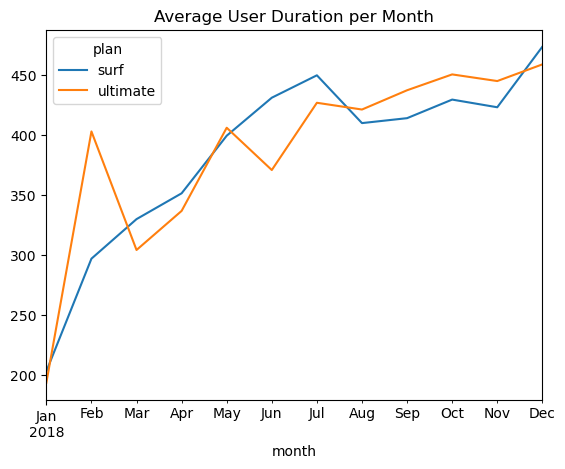

In [47]:
#plt.figure(figsize=(12, 5))
#plt.title('Average User Duration per Month')
#sns.lineplot(data=calls_avg_duration, x="month")
#plt.show()
calls_avg_duration.plot(kind='line', x='month', title= 'Average User Duration per Month')


Terlihat pada kedua tipe paket, jumlah rata-rata durasinya mengalami kenaikan dari awal tahun. Perbedaan durasi rata-rata yang mencolok terjadi di bulan Februari, tetapi pada bulan-bulan berikutnya perbedaan rata-rata durasinya tidak terlalu mencolok

In [48]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. Buatlah sebuah histogram.
calls_duration_monthly = pd.pivot_table(three_agg_dataset, index='month', columns='plan', values='duration', aggfunc='sum').reset_index()
#calls_duration_monthly['month'] = calls_duration_monthly['month'].astype(str)
calls_duration_monthly


plan,month,surf,ultimate
0,2018-01,406.0,774.0
1,2018-02,2673.0,2822.0
2,2018-03,7590.0,3651.0
3,2018-04,17577.0,7074.0
4,2018-05,30768.0,11781.0
5,2018-06,41836.0,17435.0
6,2018-07,54448.0,25197.0
7,2018-08,66438.0,29922.0
8,2018-09,80360.0,37626.0
9,2018-10,101846.0,47778.0


<Axes: title={'center': 'Total Duration of Surf and Ultimate plan per Month'}, xlabel='month'>

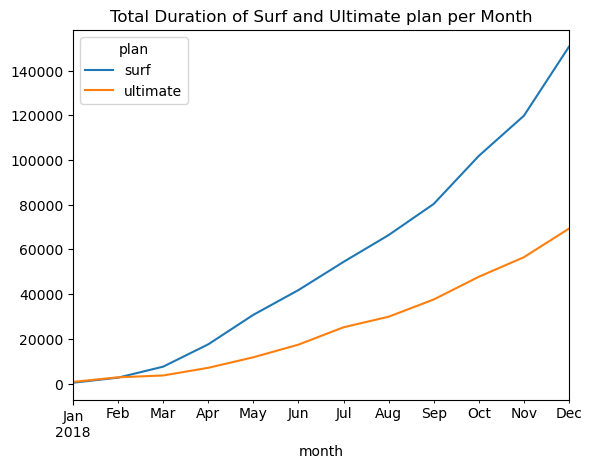

In [51]:
#plt.figure(figsize=(12, 5))
#plt.title('Total Duration of Surf and Ultimate plan per Month')
#sns.lineplot(data=calls_duration_monthly, x="month", y="surf", color='red')
#sns.lineplot(data=calls_duration_monthly, x="month", y="ultimate", color='blue')
#plt.show()

calls_duration_monthly.plot(kind='line', x='month', title= 'Total Duration of Surf and Ultimate plan per Month')

Jika dilihat dari total jumlah durasi telfon, pelanggan dengan paket surf lebih banyak daripada ultimate. Kemungkinan ini bisa terjadi karena jumlah pelanggan paket surf juga lebih banyak dibandingkan pake ultimate.

#### Varians & Boxplot Panggilan

In [52]:
# mempersiapkan perhitungan data varians
# hitung rata-rata dan varians dari durasi panggilan bulanan
avg_user_calls = pd.pivot_table(three_agg_dataset, index='user_id', columns='plan', values='duration', aggfunc='mean').reset_index()


In [53]:
# dapatkan user surf
avg_surf_calls = avg_user_calls.loc[:, ['user_id', 'surf']].dropna()
avg_surf_calls.head()

plan,user_id,surf
1,1001,345.600000
2,1002,276.333333
3,1003,1104.000000
4,1004,346.500000
5,1005,496.000000


In [54]:
# dapatkan user ultimate
avg_ulti_calls = avg_user_calls.loc[:, ['user_id', 'ultimate']].dropna()
avg_ulti_calls.head()

plan,user_id,ultimate
0,1000,124.000000
6,1006,34.500000
8,1008,518.666667
11,1011,415.285714
13,1013,219.000000


In [55]:
# varians dan standar deviasi
# surf
surf_std_calls = round(avg_surf_calls['surf'].std(), 1)
surf_var_calls = round(avg_surf_calls['surf'].var(), 1)
print('Surf:')
print(f'Standar Deviasinya {surf_std_calls}')
print(f'Varians nya {surf_var_calls}')
print()
ulti_std_calls = round(avg_ulti_calls['ultimate'].std(), 1)
ulti_var_calls = round(avg_ulti_calls['ultimate'].var(), 1)
# ultimate
print('Ultimate:')
print(f'Standar Deviasinya {ulti_std_calls}')
print(f'Varians nya {ulti_var_calls}')

Surf:
Standar Deviasinya 199.4
Varians nya 39748.1

Ultimate:
Standar Deviasinya 200.4
Varians nya 40143.0


Dari segi sebaran pengeluaran, keduanya tampaknya memiliki kinerja yang serupa. Namun, penting untuk diingat bahwa informasi ini hanya mencerminkan variabilitas dalam data dan tidak memberikan pandangan lengkap tentang seluruh kinerja paket prabayar tersebut.

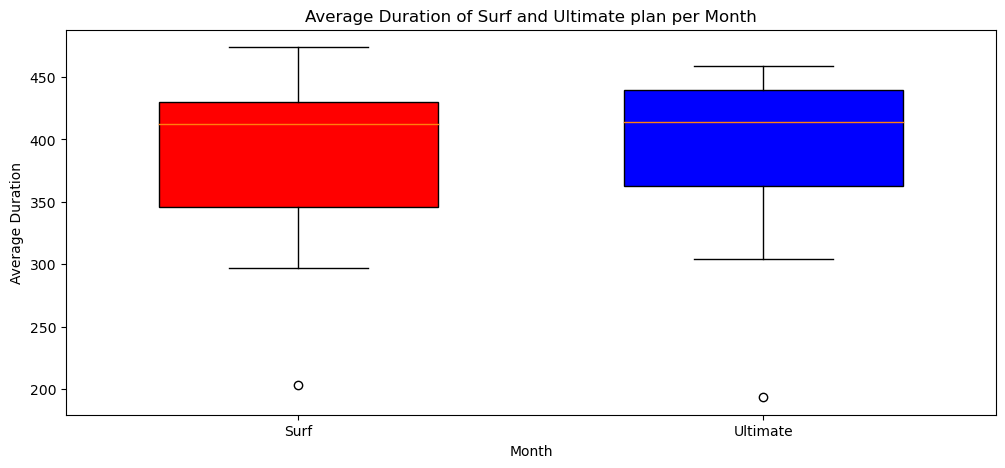

In [56]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi durasi panggilan bulanan
# dataframe calls_avg_duration berisi data yang akan digunakan dalam boxplot

plt.figure(figsize=(12, 5))
plt.title('Average Duration of Surf and Ultimate plan per Month')

# membuat boxplot untuk plan "surf" dengan warna merah
plt.boxplot(calls_avg_duration['surf'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red'), labels=['Surf'])

# membuat boxplot untuk plan "ultimate" dengan warna biru
plt.boxplot(calls_avg_duration['ultimate'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'), labels=['Ultimate'])
plt.xlabel('Month')
plt.ylabel('Average Duration')
plt.show()

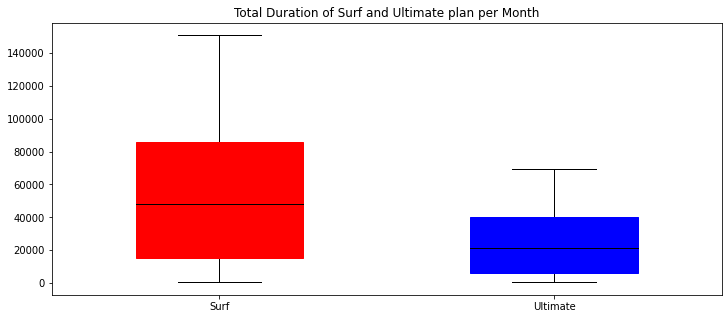

In [72]:
# dataframe calls_duration_monthly berisi data yang akan digunakan dalam boxplot
plt.figure(figsize=(12, 5))
plt.title('Total Duration of Surf and Ultimate plan per Month')

# Membuat boxplot untuk plan "surf" dengan warna merah
plt.boxplot(calls_duration_monthly['surf'], positions=[1], widths=0.5, patch_artist=True,
            boxprops=dict(facecolor='red', color='red'), medianprops=dict(color='black'))

# Membuat boxplot untuk plan "ultimate" dengan warna biru
plt.boxplot(calls_duration_monthly['ultimate'], positions=[2], widths=0.5, patch_artist=True,
            boxprops=dict(facecolor='blue', color='blue'), medianprops=dict(color='black'))

plt.xticks([1, 2], ['Surf', 'Ultimate'])
plt.show()

Walaupun pada bagian average menunjukan data lebih condong ke kiri. Kita bisa pastikan bahwa di upper whisker terlihat perbedaan yang signifikan bahwa user surf lebih dominan dan lebih sering digunakan. Apakah user memang banyak yang tertarik dengan tawaran yang di dapat oleh data surf? Apakah ini hanya memandang sebuah efektifitas data?

### Pesan/SMS

- Kita di sini akan mempelajari dengan memvisualisasikan data dari panggilan. 

In [58]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya
messages_sum = pd.pivot_table(three_agg_dataset, index='month', columns='plan', values='messages', aggfunc='sum').reset_index()
#messages_sum['month'] = messages_sum['month'].astype(str)
messages_sum

plan,month,surf,ultimate
0,2018-01,21.0,62.0
1,2018-02,108.0,151.0
2,2018-03,351.0,243.0
3,2018-04,870.0,463.0
4,2018-05,1849.0,931.0
5,2018-06,2454.0,1379.0
6,2018-07,3271.0,1937.0
7,2018-08,4662.0,2732.0
8,2018-09,5968.0,3259.0
9,2018-10,8020.0,4181.0


<Axes: title={'center': 'Total Messages of Surf and Ultimate plan per Month'}, xlabel='month'>

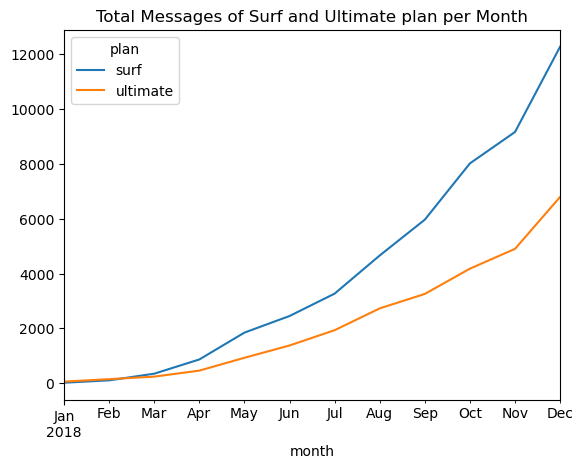

In [59]:
#plt.figure(figsize=(12, 5))
#plt.title('Total SMS of Surf and Ultimate plan per Month')
##sns.lineplot(data=messages_sum, x="month", y="surf", color='red')
#sns.lineplot(data=messages_sum, x="month", y="ultimate", color='blue')
#plt.show()

messages_sum.plot(kind='line', x='month', title= 'Total Messages of Surf and Ultimate plan per Month')

Ini menggambarkan jumlah total SMS yang dikirim oleh pengguna Surf dan Ultimate setiap bulannya. Dalam visualisasi ini, kita dapat melihat bahwa jumlah total SMS untuk paket Surf secara konsisten lebih tinggi daripada paket Ultimate. Ini berarti pengguna Surf secara keseluruhan mengirim lebih banyak SMS dibandingkan pengguna Ultimate.

In [60]:
# Bandingkan rata-rata SMS yang cenderung dikirim pengguna tiap paket per bulannya
messages_avg = pd.pivot_table(three_agg_dataset, index='month', columns='plan', values='messages', aggfunc='mean').reset_index()
#messages_avg['month'] = messages_avg['month'].astype(str)
messages_avg


plan,month,surf,ultimate
0,2018-01,10.500000,15.500000
1,2018-02,12.000000,21.571429
2,2018-03,15.260870,20.250000
3,2018-04,17.400000,22.047619
4,2018-05,24.012987,32.103448
5,2018-06,25.298969,29.340426
6,2018-07,27.033058,32.830508
7,2018-08,28.777778,38.478873
8,2018-09,30.762887,37.895349
9,2018-10,33.839662,39.443396


<Axes: title={'center': 'Average Messages of Surf and Ultimate plan per Month'}, xlabel='month'>

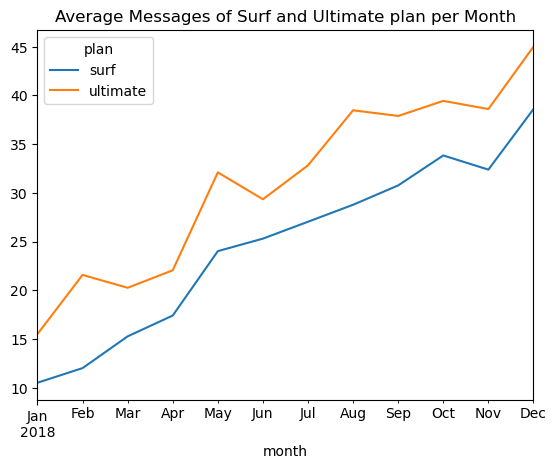

In [62]:
#plt.figure(figsize=(12, 5))
#plt.title('Average SMS of Surf and Ultimate plan per Month')
#sns.lineplot(data=messages_avg, x="month", y="surf", color='red')
#sns.lineplot(data=messages_avg, x="month", y="ultimate", color='blue')
#plt.show()

messages_avg.plot(kind='line', x='month', title= 'Average Messages of Surf and Ultimate plan per Month')

Ini menggambarkan rata-rata jumlah SMS yang dikirim oleh pengguna Surf dan Ultimate setiap bulannya. Pada visualisasi ini, kita dapat melihat bahwa rata-rata SMS yang dikirim oleh pengguna paket Ultimate cenderung lebih tinggi daripada rata-rata SMS yang dikirim oleh pengguna paket Surf. 

Hal ini menunjukkan bahwa, meskipun jumlah total SMS pengguna Ultimate lebih rendah, pengguna Ultimate cenderung mengirim lebih banyak SMS per pengguna dibandingkan pengguna Surf.

#### Varians & Boxplot Pesan/SMS

In [63]:
# mempersiapkan perhitungan data varians
# hitung rata-rata dan varians dari durasi panggilan bulanan
avg_user_messages = pd.pivot_table(three_agg_dataset, index='user_id', columns='plan', values='messages', aggfunc='mean').reset_index()

In [64]:
# dapatkan user surf
avg_surf_messages = avg_user_messages.loc[:, ['user_id', 'surf']].dropna()
avg_surf_messages.head()

plan,user_id,surf
1,1001,41.400000
2,1002,29.333333
3,1003,50.000000
4,1004,22.125000
5,1005,11.000000


In [65]:
# dapatkan user ultimate
avg_ulti_messages = avg_user_messages.loc[:, ['user_id', 'ultimate']].dropna()
avg_ulti_messages.head()

plan,user_id,ultimate
0,1000,11.0
6,1006,77.0
8,1008,28.0
11,1011,53.0
13,1013,16.0


In [66]:
# varians dan standar deviasi
# surf
surf_std_messages = round(avg_surf_messages['surf'].std(), 1)
surf_var_messages = round(avg_surf_messages['surf'].var(), 1)
print('Surf:')
print(f'Standar Deviasinya {surf_std_messages}')
print(f'Varians nya {surf_var_messages}')
print()
ulti_std_messages = round(avg_ulti_messages['ultimate'].std(), 1)
ulti_var_messages = round(avg_ulti_messages['ultimate'].var(), 1)
# ultimate
print('Ultimate:')
print(f'Standar Deviasinya {ulti_std_messages}')
print(f'Varians nya {ulti_var_messages}')

Surf:
Standar Deviasinya 31.0
Varians nya 962.1

Ultimate:
Standar Deviasinya 32.9
Varians nya 1084.2


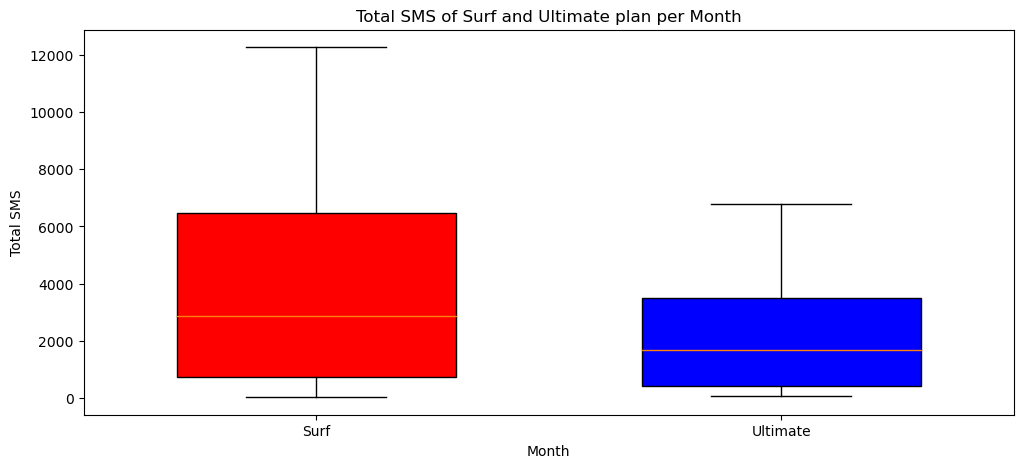

In [67]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi sms bulanan
# dataframe messages_sum berisi data yang akan digunakan dalam boxplot
plt.figure(figsize=(12, 5))
plt.title('Total SMS of Surf and Ultimate plan per Month')

# membuat boxplot untuk plan "surf" dengan warna merah
plt.boxplot(messages_sum['surf'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red'), labels=['Surf'])

# membuat boxplot untuk plan "ultimate" dengan warna biru
plt.boxplot(messages_sum['ultimate'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'), labels=['Ultimate'])
plt.xlabel('Month')
plt.ylabel('Total SMS')
plt.show()

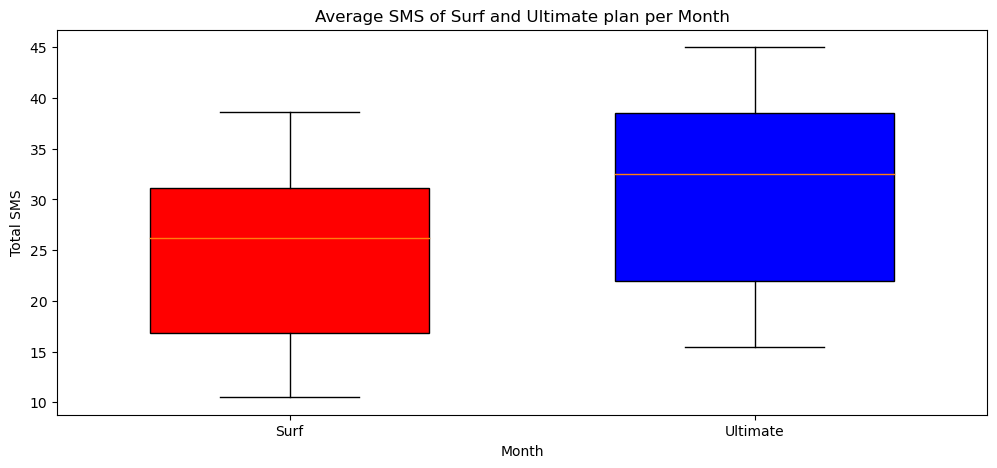

In [68]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi sms bulanan
# dataframe messages_avg berisi data yang akan digunakan dalam boxplot
plt.figure(figsize=(12, 5))
plt.title('Average SMS of Surf and Ultimate plan per Month')

# membuat boxplot untuk plan "surf" dengan warna merah
plt.boxplot(messages_avg['surf'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red'), labels=['Surf'])

# membuat boxplot untuk plan "ultimate" dengan warna biru
plt.boxplot(messages_avg['ultimate'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'), labels=['Ultimate'])
plt.xlabel('Month')
plt.ylabel('Total SMS')
plt.show()

Kita bisa lihat kecondongan data yang disebabkan oleh beberapa faktor yang memungkinkan bahwa rata-rata SMS pengguna Ultimate lebih tinggi karena ada lebih sedikit pengguna Ultimate yang membagi jumlah SMS yang dikirim secara keseluruhan.

### Internet


In [69]:
# Bandingkan jumlah traffic internet yang dihabiskan oleh pengguna per paket (gb_used)
internet_sum = pd.pivot_table(three_agg_dataset, index='month', columns='plan', values='gb_used', aggfunc='sum').reset_index()
#internet_sum['month'] = internet_sum['month'].astype(str)
internet_sum

plan,month,surf,ultimate
0,2018-01,10.0,29.0
1,2018-02,110.0,121.0
2,2018-03,312.0,221.0
3,2018-04,611.0,343.0
4,2018-05,1087.0,489.0
5,2018-06,1502.0,725.0
6,2018-07,2042.0,973.0
7,2018-08,2735.0,1267.0
8,2018-09,3238.0,1463.0
9,2018-10,4126.0,1878.0


<Axes: title={'center': 'Total Internet Data(Gb) of Surf and Ultimate plan per Month'}, xlabel='month'>

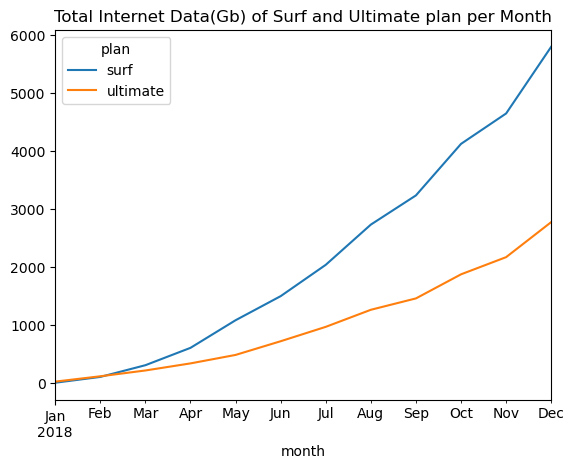

In [70]:
#plt.figure(figsize=(12, 5))
#plt.title('Total Internet Data(Gb) of Surf and Ultimate plan per Month')
##sns.lineplot(data=internet_sum, x="month", y="surf", color='red')
##sns.lineplot(data=internet_sum, x="month", y="ultimate", color='blue')
#plt.show()

internet_sum.plot(kind='line', x='month', title= 'Total Internet Data(Gb) of Surf and Ultimate plan per Month')

Jika dilihat dari total, wajar apabila paket surf memiliki grafik yang lebih tinggi dibandingkan ultimate, dikarenakan jumlah pelanggan pada paket ini juga lebih banyak

In [71]:
# Bandingkan rata-rata traffic internet yang dihabiskan oleh pengguna per paket (gb_used)
internet_avg = pd.pivot_table(three_agg_dataset, index='month', columns='plan', values='gb_used', aggfunc='mean').reset_index()
#internet_avg['month'] = internet_sum['month'].astype(str)
internet_avg

plan,month,surf,ultimate
0,2018-01,5.000000,7.250000
1,2018-02,12.222222,17.285714
2,2018-03,13.565217,18.416667
3,2018-04,12.220000,16.333333
4,2018-05,14.116883,16.862069
5,2018-06,15.484536,15.425532
6,2018-07,16.876033,16.491525
7,2018-08,16.882716,17.845070
8,2018-09,16.690722,17.011628
9,2018-10,17.409283,17.716981


<Axes: title={'center': 'Average Internet Data(Gb) of Surf and Ultimate plan per Month'}, xlabel='month'>

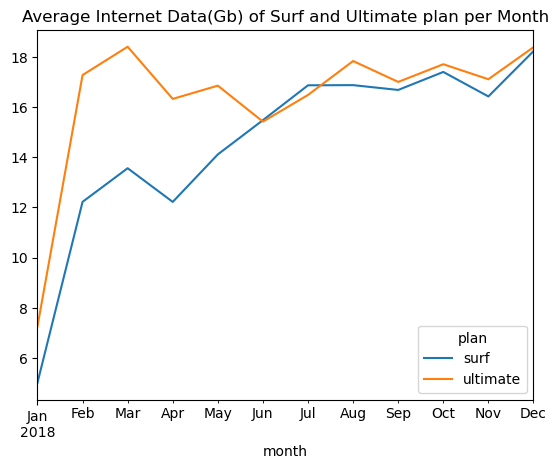

In [72]:
#plt.figure(figsize=(12, 5))
#plt.title('Average Internet Data(Gb) of Surf and Ultimate plan per Month')
#sns.lineplot(data=internet_avg, x="month", y="surf", color='red')
#sns.lineplot(data=internet_avg, x="month", y="ultimate", color='blue')
#plt.show()

internet_avg.plot(kind='line', x='month', title= 'Average Internet Data(Gb) of Surf and Ultimate plan per Month')

Sama dengan sebelumnya, dengan sedikitnya kuantitas pengguna ultimate, paket ultimate memiliki frekuensi yang cukup besar dalam penggunaan paket data. 

Hal ini didapat bahwa pengguna surf memang sangat banyak namun pengguna ultimate bisa menyelaraskan garis lineplot yang dibilang cukup lebih besar kenaikannya.

#### Varians & Boxplot Internet

In [73]:
# mempersiapkan perhitungan data varians
# hitung rata-rata dan varians dari durasi panggilan bulanan
avg_user_internet = pd.pivot_table(three_agg_dataset, index='user_id', columns='plan', values='gb_used', aggfunc='mean').reset_index()


In [74]:
# dapatkan user surf
avg_surf_internet = avg_user_internet.loc[:, ['user_id', 'surf']].dropna()
avg_surf_internet.head()

plan,user_id,surf
1,1001,16.200000
2,1002,13.666667
3,1003,27.000000
4,1004,19.625000
5,1005,17.000000


In [75]:
# dapatkan user ultimate
avg_ulti_internet = avg_user_internet.loc[:, ['user_id', 'ultimate']].dropna()
avg_ulti_internet.head()

plan,user_id,ultimate
0,1000,2.000000
6,1006,17.500000
8,1008,18.666667
11,1011,18.857143
13,1013,20.000000


In [76]:
# varians dan standar deviasi
# surf
surf_std_internet = round(avg_surf_internet['surf'].std(), 1)
surf_var_internet = round(avg_surf_internet['surf'].var(), 1)
print('Surf:')
print(f'Standar Deviasinya {surf_std_internet}')
print(f'Varians nya {surf_var_internet}')
print()
ulti_std_internet = round(avg_ulti_internet['ultimate'].std(), 1)
ulti_var_internet = round(avg_ulti_internet['ultimate'].var(), 1)
# ultimate
print('Ultimate:')
print(f'Standar Deviasinya {ulti_std_internet}')
print(f'Varians nya {ulti_var_internet}')

Surf:
Standar Deviasinya 6.1
Varians nya 37.2

Ultimate:
Standar Deviasinya 5.8
Varians nya 33.4


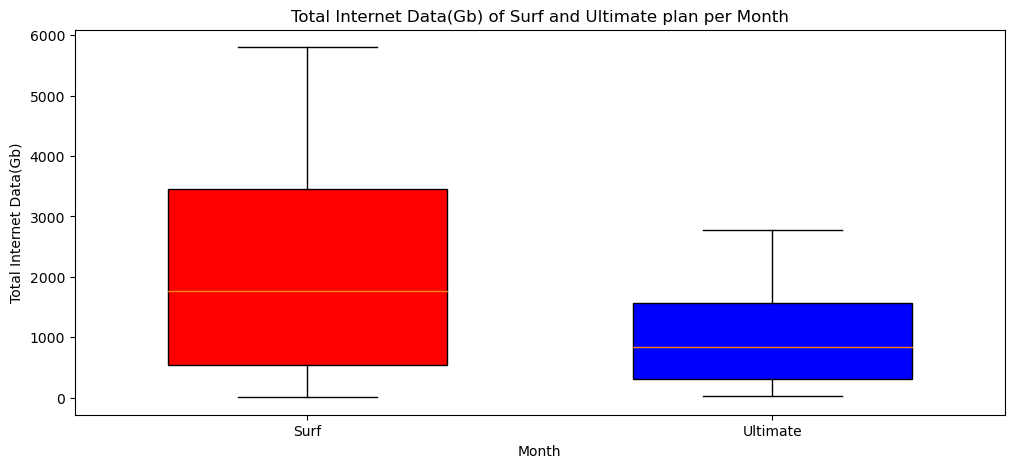

In [77]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi internet bulanan
# dataframe internet_sum berisi data yang akan digunakan dalam boxplot
plt.figure(figsize=(12, 5))
plt.title('Total Internet Data(Gb) of Surf and Ultimate plan per Month')

# membuat boxplot untuk plan "surf" dengan warna merah
plt.boxplot(internet_sum['surf'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red'), labels=['Surf'])

# membuat boxplot untuk plan "ultimate" dengan warna biru
plt.boxplot(internet_sum['ultimate'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'), labels=['Ultimate'])
plt.xlabel('Month')
plt.ylabel('Total Internet Data(Gb)')
plt.show()

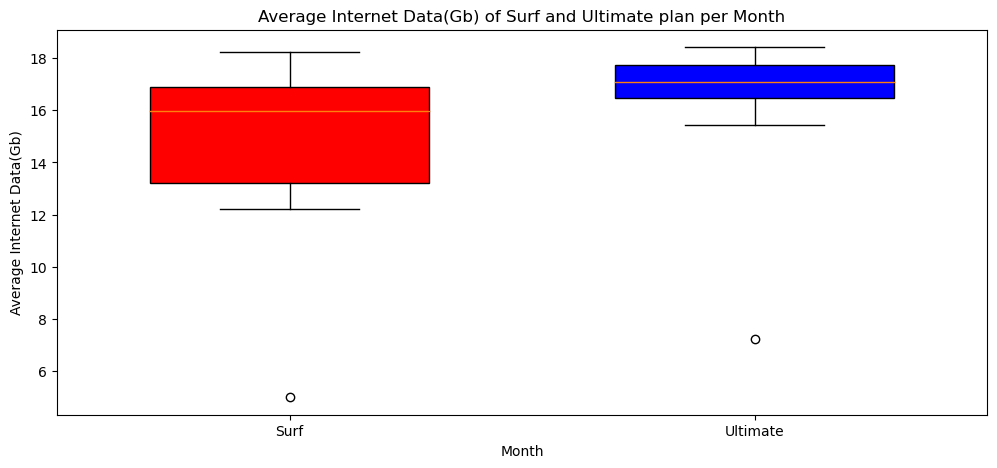

In [78]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi internet bulanan
# dataframe internet_avg berisi data yang akan digunakan dalam boxplot
plt.figure(figsize=(12, 5))
plt.title('Average Internet Data(Gb) of Surf and Ultimate plan per Month')

# membuat boxplot untuk plan "surf" dengan warna merah
plt.boxplot(internet_avg['surf'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red'), labels=['Surf'])

# membuat boxplot untuk plan "ultimate" dengan warna biru
plt.boxplot(internet_avg['ultimate'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'), labels=['Ultimate'])
plt.xlabel('Month')
plt.ylabel('Average Internet Data(Gb)')
plt.show()

Pola sudah terbentuk bahwa memang traffic penggunaannya memang besar walaupun dengan jumlah kuantitas lebih sedikit.

## Pendapatan

In [79]:
# Bandingkan total revenue oleh pengguna per paket (total_income)
income_sum = pd.pivot_table(three_agg_dataset, index='month', columns='plan', values='total_income', aggfunc='sum').reset_index()
#income_sum['month'] = income_sum['month'].astype(str)
income_sum

plan,month,surf,ultimate
0,2018-01,40.00,280.0
1,2018-02,309.57,490.0
2,2018-03,1056.65,896.0
3,2018-04,2035.53,1533.0
4,2018-05,3667.37,2051.0
5,2018-06,4779.80,3367.0
6,2018-07,7583.56,4242.0
7,2018-08,10356.85,5173.0
8,2018-09,11304.67,6195.0
9,2018-10,15504.83,7665.0


<Axes: title={'center': 'Total Income of Surf and Ultimate plan per Month'}, xlabel='month'>

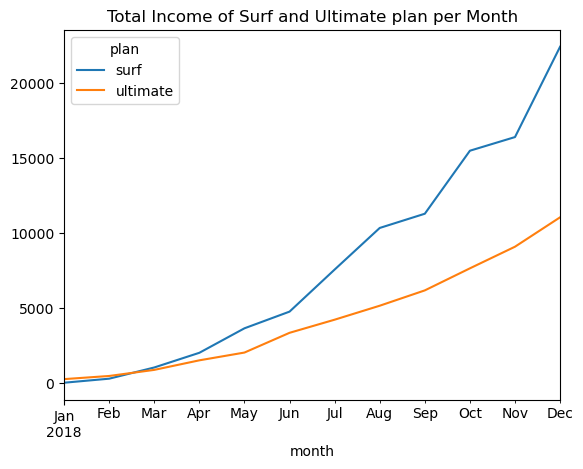

In [80]:
#plt.figure(figsize=(12, 5))
#plt.title('Total Income of Surf and Ultimate plan per Month')
#sns.lineplot(data=income_sum, x="month", y="surf", color='red')
#sns.lineplot(data=income_sum, x="month", y="ultimate", color='blue')
#plt.show()

income_sum.plot(kind='line', x='month', title= 'Total Income of Surf and Ultimate plan per Month')

In [81]:
# Bandingkan rata-rata revenue oleh pengguna per paket (total_income)
income_avg = pd.pivot_table(three_agg_dataset, index='month', columns='plan', values='total_income', aggfunc='mean').reset_index()
#income_avg['month'] = income_avg['month'].astype(str)
income_avg

plan,month,surf,ultimate
0,2018-01,20.000000,70.000000
1,2018-02,34.396667,70.000000
2,2018-03,45.941304,74.666667
3,2018-04,40.710600,73.000000
4,2018-05,47.628182,70.724138
5,2018-06,49.276289,71.638298
6,2018-07,62.674050,71.898305
7,2018-08,63.931173,72.859155
8,2018-09,58.271495,72.034884
9,2018-10,65.421224,72.311321


<Axes: title={'center': 'Average Income of Surf and Ultimate plan per Month'}, xlabel='month'>

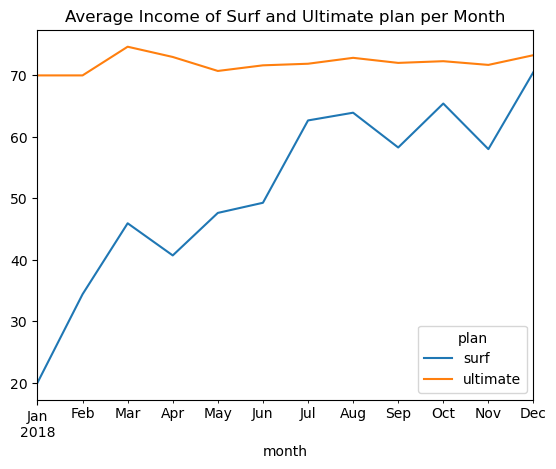

In [83]:
#plt.figure(figsize=(12, 5))
#plt.title('Average Income of Surf and Ultimate plan per Month')
#sns.lineplot(data=income_avg, x="month", y="surf", color='red')
#sns.lineplot(data=income_avg, x="month", y="ultimate", color='blue')
#plt.show()

income_avg.plot(kind='line', x='month', title= 'Average Income of Surf and Ultimate plan per Month')

Dalam grafik rata-rata pendapatan, pada paket ultimate terlihat grafik yang stabil, artinya pelanggan pada paket ini kebutuhannya tercukupi dengan apa yang ditawarkan dari paket ultimate.

Tetapi grafik pendapatan pada pelanggan paket smurf terus meningkat, ini menunjukkan bahwa pelanggan pada paket ini banyak yang melebihi batas dari apa yang ditawarkan oleh paket smurf, jadi pelanggan paket ini harus membayar ekstra.

## Menguji Hipotesis Statistik

### Uji Hipotesis Pendapatan Total di Seluruh Wilayah

- H0: Pendapatan rata-rata dari pengguna paket prabayar ultimate dan surf Sama

- H1: Pendapatan rata-rata dari pengguna paket prabayar ultimate dan surf Tidak Sama

In [88]:
# Uji hipotesisnya
surf_income = three_agg_dataset.loc[three_agg_dataset['plan']=='surf', 'total_income']
ultimate_income = three_agg_dataset.loc[three_agg_dataset['plan']=='ultimate', 'total_income']
results = st.ttest_ind(ultimate_income, surf_income, nan_policy = 'omit')
alpha = 0.05
 
print('rata-rata pendapatan dari paket ultimate:', ultimate_income.mean())
print('rata-rata pendapatan dari paket surf:', surf_income.mean())
print()
    
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print('Menolak H0, Pendapatan rata-rata dari pengguna prabayar ultimate dan surf Tidak Sama')
else:
    print('Gagal Menolak H0, Pendapatan rata-rata dari pengguna paket prabayar ultimate dan surf Tidak Sama')

rata-rata pendapatan dari paket ultimate: 72.31388888888888
rata-rata pendapatan dari paket surf: 60.706408137317226

p-value:  2.862674510698644e-08
Menolak H0, Pendapatan rata-rata dari pengguna prabayar ultimate dan surf Tidak Sama


#### Uji Hipotesis Pendapatan Hanya di Wilayah NY-NJ

- H0: Pendapatan rata-rata dari pengguna paket prabayar ultimate dan surf di wilayah NY-NJ adalah Sama

- H1: Pendapatan rata-rata dari pengguna paket prabayar ultimate dan surf NY-NJ adalah Tidak Sama

In [89]:
# Uji hipotesisnya
surf_ny_nj_income = three_agg_dataset.loc[(three_agg_dataset['plan'] == 'surf') & (three_agg_dataset['city'].str.contains('NY-NJ')), 'total_income']
ultimate_ny_nj_income = three_agg_dataset.loc[(three_agg_dataset['plan'] == 'ultimate') & (three_agg_dataset['city'].str.contains('NY-NJ')), 'total_income']
print('rata-rata pendapatan dari paket ultimate wilayah NY-NJ:', ultimate_ny_nj_income.mean())
print('rata-rata pendapatan dari paket surf wilayah NY-NJ:', surf_ny_nj_income.mean())
print()
    

results = st.ttest_ind(ultimate_ny_nj_income, surf_ny_nj_income, nan_policy = 'omit')
alpha = 0.05

if results.pvalue < alpha:
    print('Menolak H0, Pendapatan rata-rata dari pengguna paket prabayar ultimate dan surf NY-NJ adalah Tidak Sama')
else:
    print('Gagal Menolak H0, Pendapatan rata-rata dari pengguna paket prabayar ultimate dan surf di wilayah NY-NJ adalah Sama')
    

rata-rata pendapatan dari paket ultimate wilayah NY-NJ: 74.95384615384616
rata-rata pendapatan dari paket surf wilayah NY-NJ: 56.789583333333326

Menolak H0, Pendapatan rata-rata dari pengguna paket prabayar ultimate dan surf NY-NJ adalah Tidak Sama


**Kesimpulan**

Kita bisa pastikan bahwa dari semua uji hipotesis yang dilakukan. Paket ultimate memiliki pendapatan yang cukup besar karena harga yang ditetapkan dan tawaran yang ditetapkan memengaruhi pendapatan tersebut.


## Kesimpulan Akhir

**Pendapatan Rata-rata:**

- Pendapatan rata-rata dari pengguna paket prabayar "Ultimate" (sekitar 72.31 USD) lebih tinggi daripada pendapatan rata-rata dari pengguna paket prabayar "Surf" (sekitar 60.71 USD) selama tahun 2018. Sedangkan untuk per wilayah (NY-NJ), paket prabayar "Ultimate" (sekitar 74.95 USD) lebih tinggi daripada pendapatan rata-rata dari pengguna paket prabayar "Surf" (sekitar 56.78 USD)

**Perilaku Pelanggan:**
- Pengguna paket "Surf" cenderung mengirim lebih banyak SMS dibandingkan pengguna paket "Ultimate," meskipun jumlah total SMS yang dikirim oleh pengguna "Surf" lebih rendah.
- Pengguna paket "Ultimate" cenderung menghabiskan lebih banyak waktu untuk panggilan telepon, yang mungkin merupakan salah satu faktor yang menyebabkan pendapatan mereka lebih tinggi.



**Fokus pada Paket "Ultimate":**
- Dengan mempertimbangkan pendapatan rata-rata yang lebih tinggi dari pengguna paket "Ultimate," perusahaan Megaline sebaiknya mempertimbangkan untuk lebih fokus dalam memasarkan paket ini kepada pelanggan.

**Strategi Pemasaran:**
- Perusahaan dapat mengoptimalkan strategi pemasaran dengan menyoroti keunggulan dan manfaat dari paket "Ultimate" yang lebih menarik bagi pelanggan.

**Penawaran Khusus:**
- Perusahaan dapat mempertimbangkan penawaran khusus atau insentif bagi pelanggan yang ingin beralih ke paket "Ultimate" untuk mendorong konversi.
